In [9]:
#import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Data Preparation

In [10]:
#read myopia.csv into pandas Dataframe
data_path = 'Resources/myopia.csv'
df = pd.read_csv(data_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [11]:
#Remove the "myopic" column from the dataset
new_df = df.drop(columns=["MYOPIC"])
new_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [13]:
#find null values
# Find null values
for column in new_df.columns:
    print(f"Column {column} has {new_df[column].isnull().sum()} null values")




Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values


In [21]:
cleaned_df_path = Path('Resources/clean_myopia.csv')
new_df.to_csv(cleaned_df_path, index=False)

In [24]:
#Standardize df
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Scaled_data =  scaler.fit_transform(new_df)
scaled_data[1]


array([-0.42021911, -0.30861224, -0.1718398 ,  0.53591028, -0.96799728,
       -0.13076253, -0.99889822, -0.91206246, -0.36187479, -0.22140908,
       -0.34093217, -0.87508755,  0.98713773,  1.0032415 ])

# Dimensionality Reduction

In [30]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components = 0.9)
myopia_pca = pca.fit_transform(scaled_data)
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [31]:
myopia_pca.shape

(618, 10)

In [33]:
tsne = TSNE(learning_rate=250)

tsne_features = tsne.fit_transform(myopia_pca)

/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [34]:
tsne_features.shape

(618, 2)

In [37]:
#scatter plot of t-SNE output
import matplotlib.pyplot as plt

In [38]:
#set label values
labels = df['MYOPIC']


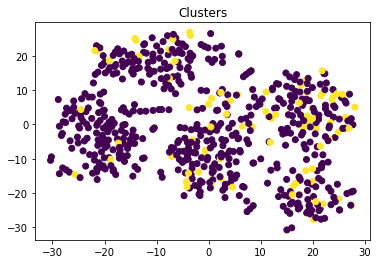

In [47]:
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
plt.title("Clusters")
plt.show()

# Cluster Analysis with K-means

In [42]:
# Use a `for` loop to determine the inertia for each `k` between 1 through 10.
from sklearn.cluster import KMeans
inertia = []

inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters = i, random_state = 0)
    km.fit(myopia_pca)
    inertia.append(km.inertia_)
    
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()


,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


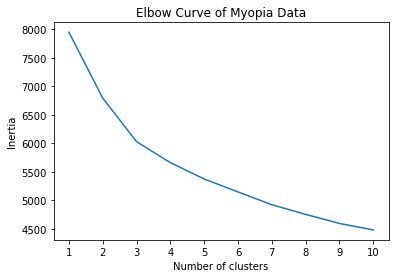

In [43]:
#elbow plot to identify the best number of clusters.
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve of Myopia Data')
plt.show()

# Recommendation

While the number of distinct clusters isn't quite clear, it shows however that the patients can be clustered due to the depicted number of clusters shown by the graph(3). 